In [1]:
import cv2
import numpy as np
from geometry_classes import Point, Line
from skimage.util import random_noise
from sklearn.metrics import mean_squared_error
from utility_funcs import *
import matplotlib.pyplot as plt

In [1251]:
# orig = cv2.imread('img/pdd16.jpg')
orig = cv2.imread('HighwayDriving/Train/TrainSeq04/image/TrainSeq04_RGB_Image_0010.png')
# orig = cv2.imread('HighwayDriving/Test/TestSeq01/image/TestSeq01_RGB_Image_0006.png')

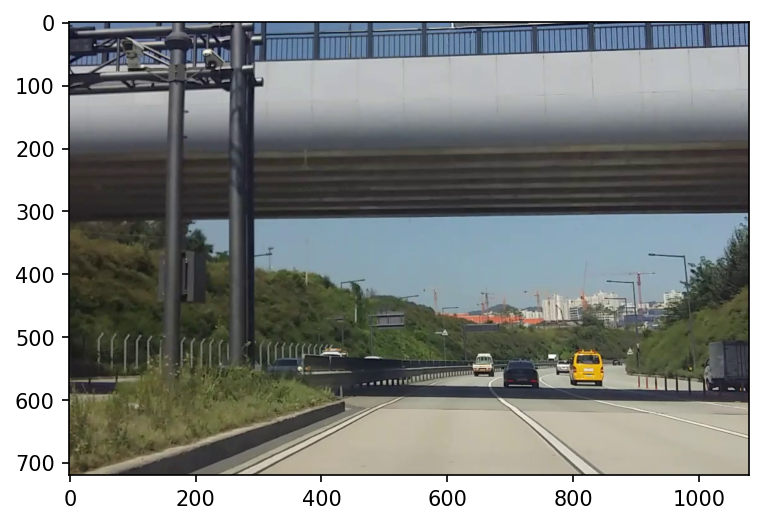

In [1252]:
plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.show()

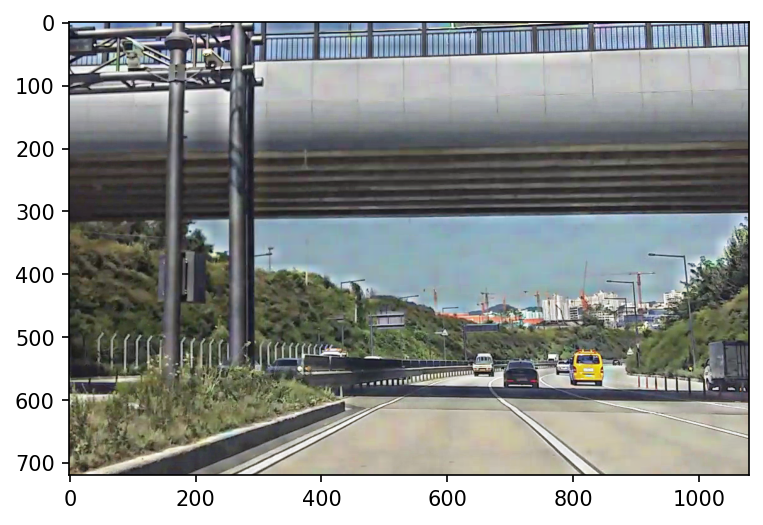

In [1253]:
lab = np.copy(orig)

# lab = cv2.cvtColor(lab, cv2.COLOR_BGR2LAB)

lab_planes = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(50,50))

lab_planes[0] = clahe.apply(lab_planes[0])
lab_planes[1] = clahe.apply(lab_planes[1])
lab_planes[2] = clahe.apply(lab_planes[2])

lab = cv2.merge(lab_planes)

# orig = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
orig = lab
plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.show()

In [1254]:
# brightness = []
# for i in range(14):
#     name = 'TrainSeq'
#     if i < 10:
#         name += '0' + str(i)
#     else:
#         name += str(i)
#     full_name = 'HighwayDriving/Train/' + name + '/image/' + name + '_RGB_Image_0001.png'
#     estim = cv2.imread(full_name)
    
#     estim = cv2.cvtColor(estim, cv2.COLOR_BGR2HSV)    
#     estim = estim[int(estim.shape[0]*0.6):estim.shape[0], 0:estim.shape[1]]
#     light = estim[:,:, 2]

#     # maxl = np.max(light)
#     # estim = cv2.cvtColor(estim, cv2.COLOR_HSV2RGB)
#     # plt.imshow(estim)
#     # plt.show()
#     brightness.append(np.mean(light))

# mean_brightness = np.mean(brightness)  

In [1255]:
if (orig.shape[0] > 1000 or orig.shape[1] > 1000):
    orig = cv2.resize(orig, (1000, 1000))

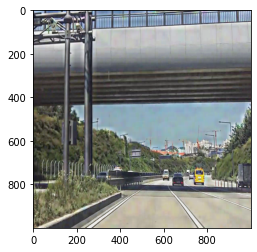

In [1256]:

plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.show()

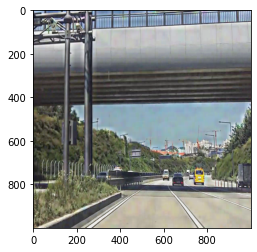

In [1257]:
# est = orig
# est = cv2.cvtColor(est, cv2.COLOR_BGR2HSV)
# est = est[int(est.shape[0]*0.6):est.shape[0], 0:est.shape[1]]
# light = est[:,:, 2]

# maxl = np.max(light)

# bright = np.mean(light)

# if mean_brightness > bright:
    # orig = cv2.addWeighted(orig, 1, orig, 1, 0)

# alpha, gamma = adjust_brightness(orig)

# gr = np.copy(orig)
# gr = cv2.cvtColor(gr, cv2.COLOR_BGR2GRAY)
# clahe = cv2.createCLAHE()
# gr = clahe.apply(gr)
# gr = cv2.cvtColor(gr, cv2.COLOR_GRAY2BGR)

# orig = cv2.addWeighted(orig, 1, gr, 0.5, 0)

plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.show()

In [1258]:
crop = orig[int(orig.shape[0]*0.6):orig.shape[0], 0:orig.shape[1]]

wrp_img = np.copy(crop)

# pos_lines = find_lines(wrp_img)

hsl = cv2.cvtColor(crop, cv2.COLOR_BGR2HLS)
# lower = np.array([200, 200, 200], dtype="uint8")
# upper = np.array([255, 255, 255], dtype="uint8")
# lines_mask = cv2.inRange(wrp_img, lower, upper)
# lines_mask_copy = cv2.bitwise_and(
#     wrp_img, wrp_img, mask=lines_mask)
    
pos_lines = find_lines(hsl)

lower = np.array([0, 175, 0], dtype="uint8")
upper = np.array([255, 255, 255], dtype="uint8")
lines_mask = cv2.inRange(hsl, lower, upper)
lines_mask_copy = cv2.bitwise_and(
    hsl, hsl, mask=lines_mask)

warped_img = cv2.cvtColor(hsl, cv2.COLOR_HLS2BGR)
lines_mask_copy = cv2.cvtColor(lines_mask_copy, cv2.COLOR_HLS2BGR)

# pos_lines = find_lines(lines_mask_copy)

white_lines = find_white_lines_by_segments(
    pos_lines, lines_mask_copy)


white_lines = merge_lines(
    white_lines, (lines_mask_copy.shape[1], lines_mask_copy.shape[0]))

test = np.copy(wrp_img)


custom_M_inv, dbg_img, dbg_lines, restored_img_size = calc_transformation_matrix_v6(
    white_lines, test)

if lines_intersect(hsl, dbg_lines[0], dbg_lines[1]):
    inter_p = intersect_point(dbg_lines[0], dbg_lines[1])
    hsl = hsl[(inter_p[1] + 10):hsl.shape[0], 0:hsl.shape[1]]
    pos_lines = find_lines(hsl)
    lower = np.array([0, 175, 0], dtype="uint8")
    upper = np.array([255, 255, 255], dtype="uint8")
    lines_mask = cv2.inRange(hsl, lower, upper)
    lines_mask_copy = cv2.bitwise_and(hsl, hsl, mask=lines_mask)
    white_lines = find_white_lines_by_segments(pos_lines, lines_mask_copy)
    white_lines = merge_lines(white_lines, (lines_mask_copy.shape[1], lines_mask_copy.shape[0]))
    test = np.copy(hsl)
    custom_M_inv, dbg_img, dbg_lines, restored_img_size = calc_transformation_matrix_v6(white_lines, test)

lines_img = np.copy(test)
custom_restored_img = cv2.warpPerspective(hsl, custom_M_inv, restored_img_size)

# custom_restored_img = cv2.warpPerspective(
#     wrp_img, custom_M_inv, restored_img_size)

In [1259]:
draw_lines(white_lines,lines_img)

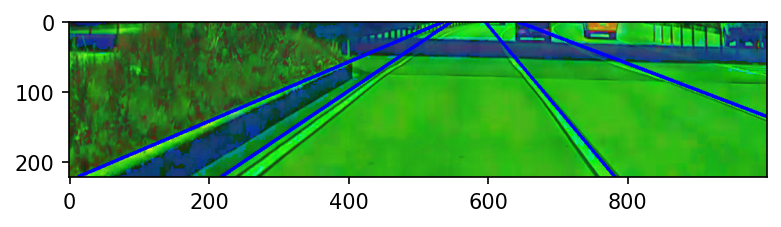

In [1260]:
plt.figure(dpi=150)
plt.imshow(cv2.cvtColor(lines_img, cv2.COLOR_BGR2RGB))
plt.show()

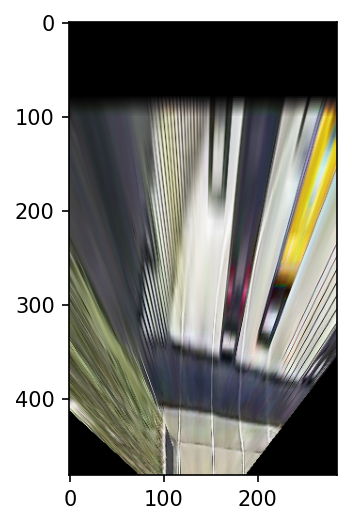

In [1261]:
plt.figure(dpi=150)
custom_restored_img = cv2.cvtColor(custom_restored_img, cv2.COLOR_HLS2RGB)
plt.imshow(custom_restored_img)
plt.show()

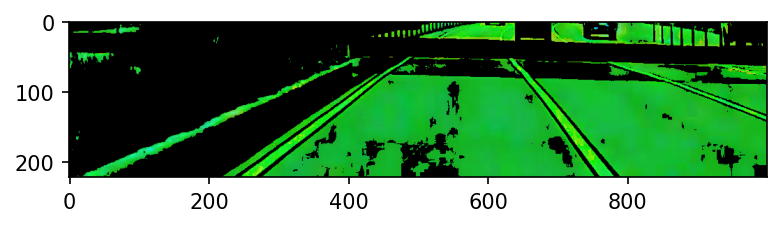

In [1262]:
plt.figure(dpi=150)
plt.imshow(lines_mask_copy)
plt.show()

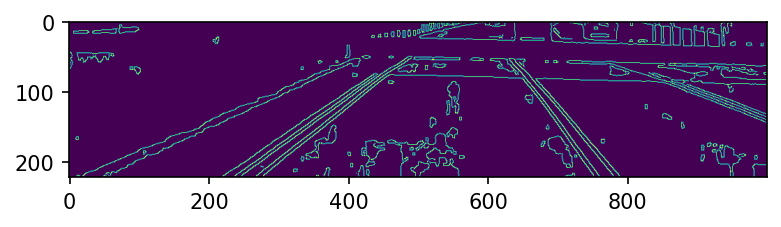

In [1263]:
plt.figure(dpi=150)
plt.imshow(Canny(lines_mask_copy))
plt.show()